In [1]:
import pandas as pd
from pandas.api.types import is_object_dtype

In [2]:
import numpy as np

In [79]:
import seaborn as sns

In [3]:
import plotly.express as px

In [65]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')
%config InlineBackend.figure_format = 'retina'

## Data

In [5]:
data_path = '../data/cars_dataset.csv'

In [25]:
cars_df = pd.read_csv(data_path, index_col=0)
n_rows, _ = cars_df.shape
print(f'DF shape: {cars_df.shape}')

for column_name in cars_df.columns:  # to make all columns names be in lowercase
    cars_df = cars_df.rename(columns={column_name: column_name.lower()})

pd.set_option('display.max_columns', None)
cars_df.sample(3)

DF shape: (22702, 54)


,mark,box,drive_unit,seats,doors,country,engine,volume,color,mileage,price,year,car_type,generation,model,drive,boost_type,cylinder_location,front_brakes,engine_volume,width,front_suspension_type,diameter_cylinder_and_stroke_piston,maximum_power,length,car_class,wheelbase,cylinders,height,fuel,torque,valves_per_cylinder,volume_fuel_tank,rear_track_width,front_track_width,curb_weight_kg,clearance,engine_location,maximum_speed,wheel_size,transmissions,speed_to_100,full_weight,compression_ratio,consumption,engine_power,restyling,release_start_series,end_serial,trunk_volume_max,trunk_volume_min,expense_city,expense_track,consumption_average
19919,Nissan,automatic,front,5.0,4.0,Japan,gasoline,1.6,gray,145600.0,370000.0,2008.0,Sedan,I 2004 – 2012,Tiida,front,no,in-line,disc ventilated,1598.0,1695.0,"independent, spring",0.0,110.0,4474.0,C,2600.0,4.0,1535.0,AI-95,156.0,4.0,45.0,1485.0,1480.0,1260.0,163.0,"front, transverse",170.0,185/65/R15,4.000000,12.600000,1715.0,11.149437,7.4,distributed injection (multi-point),0.0,2004.0,2012.0,463.0,0.0,10.0,5.9,7.4
2023,Skoda,automatic,front,5.0,5.0,Czech Republic,gasoline,1.4,silver,0.0,1908400.0,2020.0,Liftback,IV (A8) 2019 – now,Octavia,front,turbocharging,in-line,disc ventilated,1395.0,1829.0,"independent, spring",74.5,150.0,4689.0,C,2686.0,4.0,1470.0,AI-95,250.0,4.0,45.0,1535.0,1543.0,1341.0,158.0,"front, transverse",223.0,205/60/R16 205/55/R17 225/45/R18,8.000000,9.000000,1838.0,10.500000,5.5,direct injection (direct),0.0,2019.0,2020.0,600.0,1555.0,7.0,4.7,5.5
25983,Nissan,variator,front,7.0,5.0,Japan,gasoline,2.0,silver,290000.0,120000.0,2001.0,Compact MPV,1998 – 2004,Liberty,front,no,in-line,disc ventilated,1998.0,1695.0,"independent, spring",89.0,147.0,4575.0,M,2690.0,4.0,1200.0,AI-95,198.0,4.0,60.0,1470.0,1470.0,1500.0,160.0,"front, transverse",180.0,185/65/R15,5.655326,10.423527,1885.0,9.900000,0.0,distributed injection (multi-point),0.0,1998.0,2004.0,0.0,0.0,0.0,0.0,0.0


In [26]:
cat_cols = []
num_cols = []

for column_name in cars_df.columns:  # find all categorical and numerical columns
    if is_object_dtype(cars_df[column_name]):
        cat_cols.append(column_name)
    else:
        num_cols.append(column_name)

print(f'Categorical ({len(cat_cols)}):')
print(*cat_cols, sep=', ', end='\n\n')
print(f'Numerical ({len(num_cols)}):')
print(*num_cols, sep=', ')

Categorical (19):
mark, box, drive_unit, country, engine, color, car_type, generation, model, drive, boost_type, cylinder_location, front_brakes, front_suspension_type, car_class, fuel, engine_location, wheel_size, engine_power

Numerical (35):
seats, doors, volume, mileage, price, year, engine_volume, width, diameter_cylinder_and_stroke_piston, maximum_power, length, wheelbase, cylinders, height, torque, valves_per_cylinder, volume_fuel_tank, rear_track_width, front_track_width, curb_weight_kg, clearance, maximum_speed, transmissions, speed_to_100, full_weight, compression_ratio, consumption, restyling, release_start_series, end_serial, trunk_volume_max, trunk_volume_min, expense_city, expense_track, consumption_average


In [27]:
print('Count NaN values in columns:')
for column_name in cars_df.columns:  # count nan values by columns
    nans = cars_df[column_name].isna().sum()
    if nans > 0:  # if there is NaN's in column `column_name`
        print(f"\t{column_name + (25 - len(column_name)) * ' '}{nans}",end='')
        if column_name in cat_cols:
            print('\t(cat)')
        else:
            print('\t(num)')

Count NaN values in columns:
	drive                    191	(cat)
	boost_type               283	(cat)
	cylinder_location        247	(cat)
	front_brakes             191	(cat)
	front_suspension_type    191	(cat)
	car_class                221	(cat)
	fuel                     419	(cat)
	engine_location          1357	(cat)
	wheel_size               1540	(cat)
	engine_power             3562	(cat)


In [28]:
def drop_all_from_list(lst, elements):
    for elem in elements:
        if elem in lst:
            lst.remove(elem)

### Categorical features

In [29]:
cars_df.describe(include='object')  # categorical columns

,mark,box,drive_unit,country,engine,color,car_type,generation,model,drive,boost_type,cylinder_location,front_brakes,front_suspension_type,car_class,fuel,engine_location,wheel_size,engine_power
count,22702,22702,22702,22702,22702,22702,22702,22702,22702,22511,22419,22455,22511,22511,22481,22283,21345,21162,19140
unique,85,4,3,17,5,16,17,1144,749,3,3,6,4,7,9,7,4,667,5
top,Mercedes-Benz,automatic,front,German,gasoline,black,SUV,I 2006 – 2009,Astra,front,no,in-line,disc ventilated,"independent, spring",J,AI-95,"front, transverse",195/65/R15,distributed injection (multi-point)
freq,1950,12365,11161,6536,19167,6100,7086,160,275,11052,14551,16898,19195,20174,7520,15131,12540,1195,13421


In [30]:
cars_df['engine_power'].value_counts()  # count unique values in column

engine_power
distributed injection (multi-point)                     13421
direct injection (direct)                                4766
carburetor                                                762
central injection (single injection or single point)       99
combined injection (direct-distributed)                    92
Name: count, dtype: int64

In [31]:
    # too much unique values for categorical features - drop columns!
to_drop = ['generation', 'model', 'wheel_size']
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(cat_cols, to_drop)  # drop from list of categorical columns names
    
    # drop columns with high number of same elements
to_drop = ['engine', 'cylinder_location', 'front_brakes', 'front_suspension_type']
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(cat_cols, to_drop)  # drop from list of categorical columns names

In [34]:
    # data insides, that are known from "my experience"
cars_df = cars_df.drop(columns=['color'])  # drop color colomn - it does not affect the price, or affects weakly
drop_all_from_list(cat_cols, ['color'])

In [35]:
print(f'Remaining categorical features: {len(cat_cols)}')

Remaining categorical features: 11


### Numerical features

In [36]:
cars_df.describe(include='float64')  # categorical columns

,seats,doors,volume,mileage,price,year,engine_volume,width,diameter_cylinder_and_stroke_piston,maximum_power,length,wheelbase,cylinders,height,torque,valves_per_cylinder,volume_fuel_tank,rear_track_width,front_track_width,curb_weight_kg,clearance,maximum_speed,transmissions,speed_to_100,full_weight,compression_ratio,consumption,restyling,release_start_series,end_serial,trunk_volume_max,trunk_volume_min,expense_city,expense_track,consumption_average
count,22702.00000,22702.000000,22702.000000,22702.000000,2.270200e+04,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000
mean,5.01251,4.418774,2.334922,136649.516210,1.353936e+06,2009.204563,2337.199911,1813.402914,73.521181,179.413488,4577.173249,2724.365421,4.743325,1579.989827,270.861378,3.736626,63.831030,1543.233221,1543.408864,1571.717261,159.504493,197.156414,5.655326,10.423527,2118.954231,11.149437,7.154378,0.339794,2006.610078,2011.682451,472.146991,853.949520,8.730698,5.339745,6.605114
std,0.76348,0.810206,1.049301,101154.431413,2.493866e+06,9.116164,1037.923141,98.746721,27.948965,103.903355,383.100158,216.190349,1.414290,165.620161,158.724709,0.681563,15.037745,82.304702,76.891334,391.001005,49.248771,31.802900,1.283463,3.281663,468.700030,2.438177,3.640578,0.473650,10.340075,8.284589,321.706597,937.394434,5.345248,3.120095,3.929169
min,1.00000,0.000000,0.000000,0.000000,2.000000e+04,1927.000000,599.000000,1275.000000,0.000000,0.000000,2499.000000,1450.000000,0.000000,1000.000000,0.000000,2.000000,22.000000,1160.000000,1105.000000,650.000000,0.000000,75.000000,1.000000,2.800000,980.000000,5.800000,0.000000,0.000000,1927.000000,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.00000,4.000000,1.600000,62322.000000,3.740750e+05,2006.000000,1598.000000,1755.000000,77.000000,114.000000,4344.000000,2602.000000,4.000000,1453.000000,155.000000,4.000000,53.000000,1497.000000,1498.000000,1285.000000,140.000000,177.000000,5.000000,8.400000,1788.000000,10.000000,6.100000,0.000000,2003.000000,2008.000000,352.000000,0.000000,6.900000,4.700000,5.600000
50%,5.00000,5.000000,2.000000,125000.000000,6.800000e+05,2011.000000,1997.000000,1810.000000,82.000000,150.000000,4600.000000,2700.000000,4.000000,1510.000000,223.000000,4.000000,61.000000,1543.233221,1543.408864,1523.000000,160.000000,195.000000,5.655326,10.423527,2060.000000,10.500000,7.400000,0.000000,2008.000000,2013.000000,456.000000,815.000000,9.400000,5.800000,7.200000
75%,5.00000,5.000000,2.700000,191786.000000,1.420000e+06,2015.000000,2693.000000,1875.000000,86.200000,218.000000,4822.000000,2840.000000,6.000000,1695.000000,350.000000,4.000000,71.000000,1594.750000,1589.000000,1814.000000,195.000000,215.000000,6.000000,12.000000,2380.000000,11.149437,9.100000,1.000000,2013.000000,2018.000000,530.000000,1547.000000,11.700000,7.100000,8.800000
max,9.00000,5.000000,8.100000,1000000.000000,1.300000e+08,2020.000000,8128.000000,2360.000000,108.000000,762.000000,6330.000000,4085.000000,12.000000,2235.000000,1000.000000,5.000000,166.000000,2649.000000,1955.000000,3370.000000,406.000000,341.000000,10.000000,37.000000,5000.000000,23.000000,28.200000,1.000000,2020.000000,2020.000000,5800.000000,9300.000000,36.200000,21.100000,28.200000


In [37]:
num_cols_cor = cars_df[num_cols].corr()

In [38]:
potential_drop = {}

# check if correlation with price is too small
drop_th = 0.15
for _, col_name in enumerate(num_cols_cor['price'].index):
    corr_this = num_cols_cor['price'][col_name]
    if np.abs(corr_this) < drop_th:
        potential_drop[col_name] = corr_this

print(*[f"{key + (40 - len(key)) * ' ' }{val:.4f}" for key, val in potential_drop.items()], sep='\n')

seats                                   -0.0249
doors                                   -0.0417
diameter_cylinder_and_stroke_piston     -0.0059
height                                  0.1239
valves_per_cylinder                     0.1003
clearance                               -0.0567
compression_ratio                       0.0767
restyling                               0.0108
trunk_volume_max                        0.0657
trunk_volume_min                        0.0527
expense_city                            0.1070
expense_track                           0.1306
consumption_average                     0.1188


In [39]:
    # drop columns that are weak correlated with price
to_drop = list(potential_drop.keys())
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(num_cols, to_drop)  # drop from list of numerical columns names

In [41]:
cars_df.shape  # the number of features decreased from 54 to 33

(22702, 33)

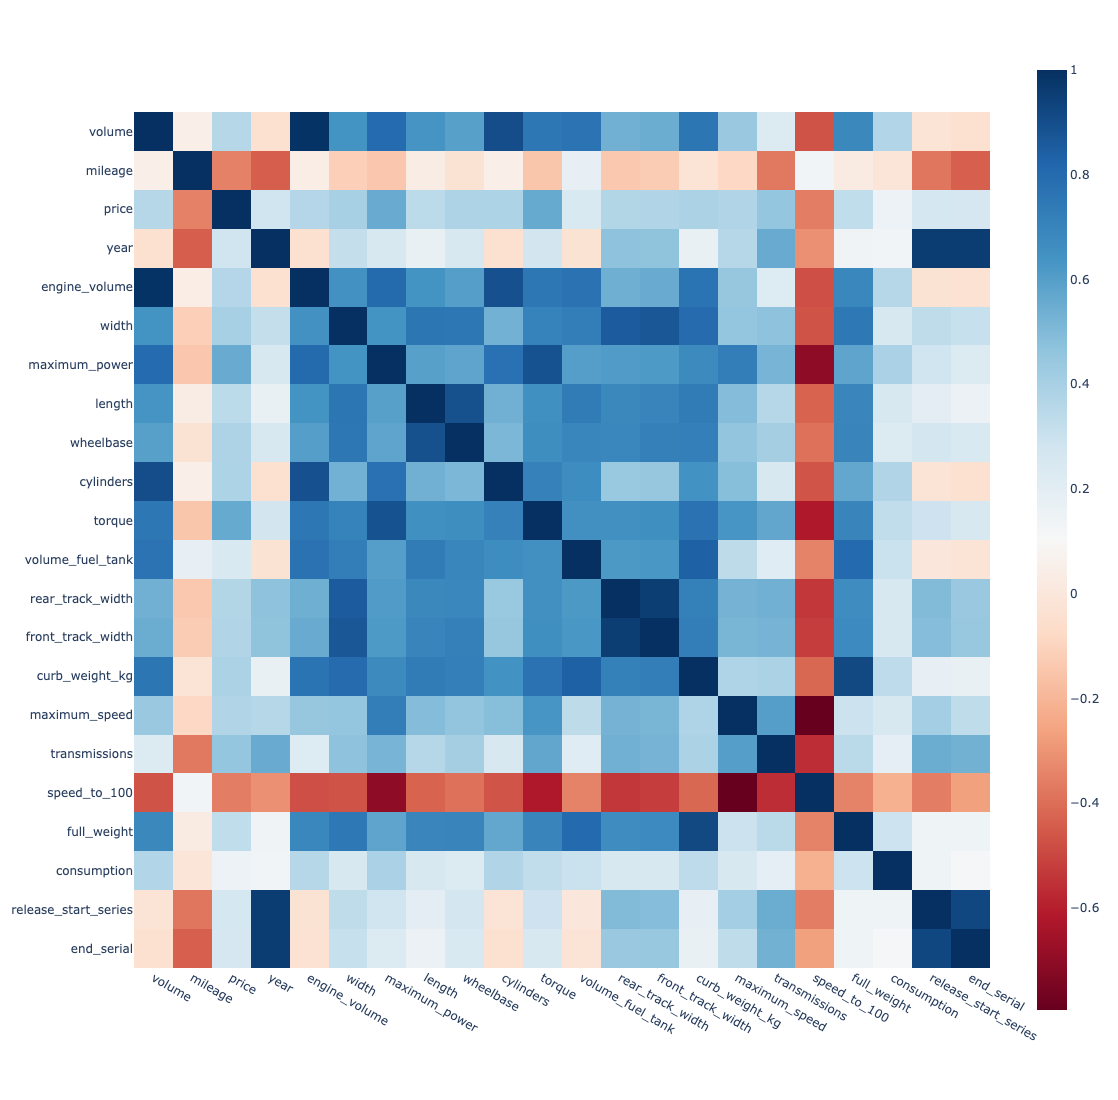

In [44]:
# correlation with plotly
fig = px.imshow(
    cars_df[num_cols].corr(),
    color_continuous_scale='RdBu',
    width=1100, height=1100
)
fig.show()

### Let's drop high correlated features

In [46]:
    # `release_start_series`, `end_serial` and `year` are highly correlated (> 0.92) - leave only `year`
to_drop = ['release_start_series', 'end_serial']
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(num_cols, to_drop)  # drop from list of numerical columns names

In [51]:
    # `cylinders` and `volume` (~0.9)
    # `engine_volume` and `volume` are highly correlated (> 0.99) - the same thing
    # `curb_weight_kg` and `full_weight` (~0.91)
    # `rear_track_width` and `front_track_width` (~0.95)
to_drop = ['cylinders', 'engine_volume', 'curb_weight_kg', 'rear_track_width']
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(num_cols, to_drop)  # drop from list of numerical columns names

In [56]:
    # `weelbase` and `length` (~ 0.89)
    # `torque` and `maximum_power` (~ 0.88)
    # 'front_track_width' and `width`(~0.87)
to_drop = ['wheelbase', 'torque', 'front_track_width']
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(num_cols, to_drop)  # drop from list of numerical columns names

In [60]:
    # `maximum_speed` and `speed_to_100` (~0.80)
    # `volume_fuel_tank` and `full_weight` (~0.80)
to_drop = ['maximum_speed', 'volume_fuel_tank']
cars_df = cars_df.drop(columns=to_drop)
drop_all_from_list(num_cols, to_drop)  # drop from list of numerical columns names

In [75]:
cars_df.shape

(22702, 22)

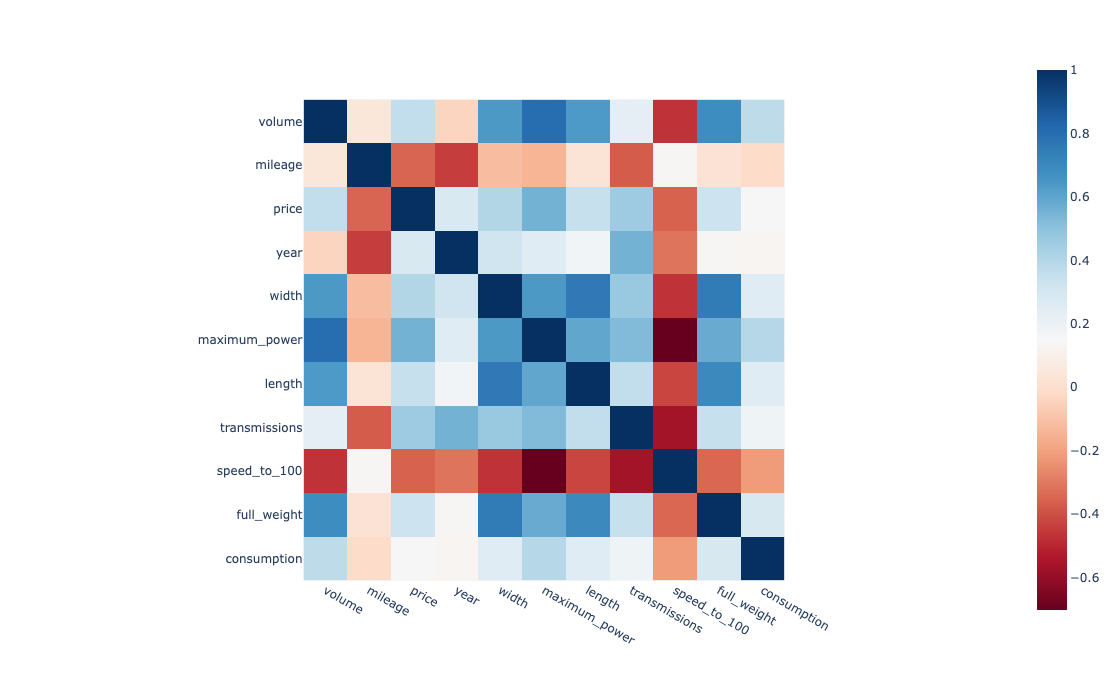

In [74]:
# correlation with plotly
fig = px.imshow(
    cars_df[num_cols].corr(),
    color_continuous_scale='RdBu',
    width=700, height=700
)
fig.show()
fig.write_html('eda_html/num_cols_corr.html')

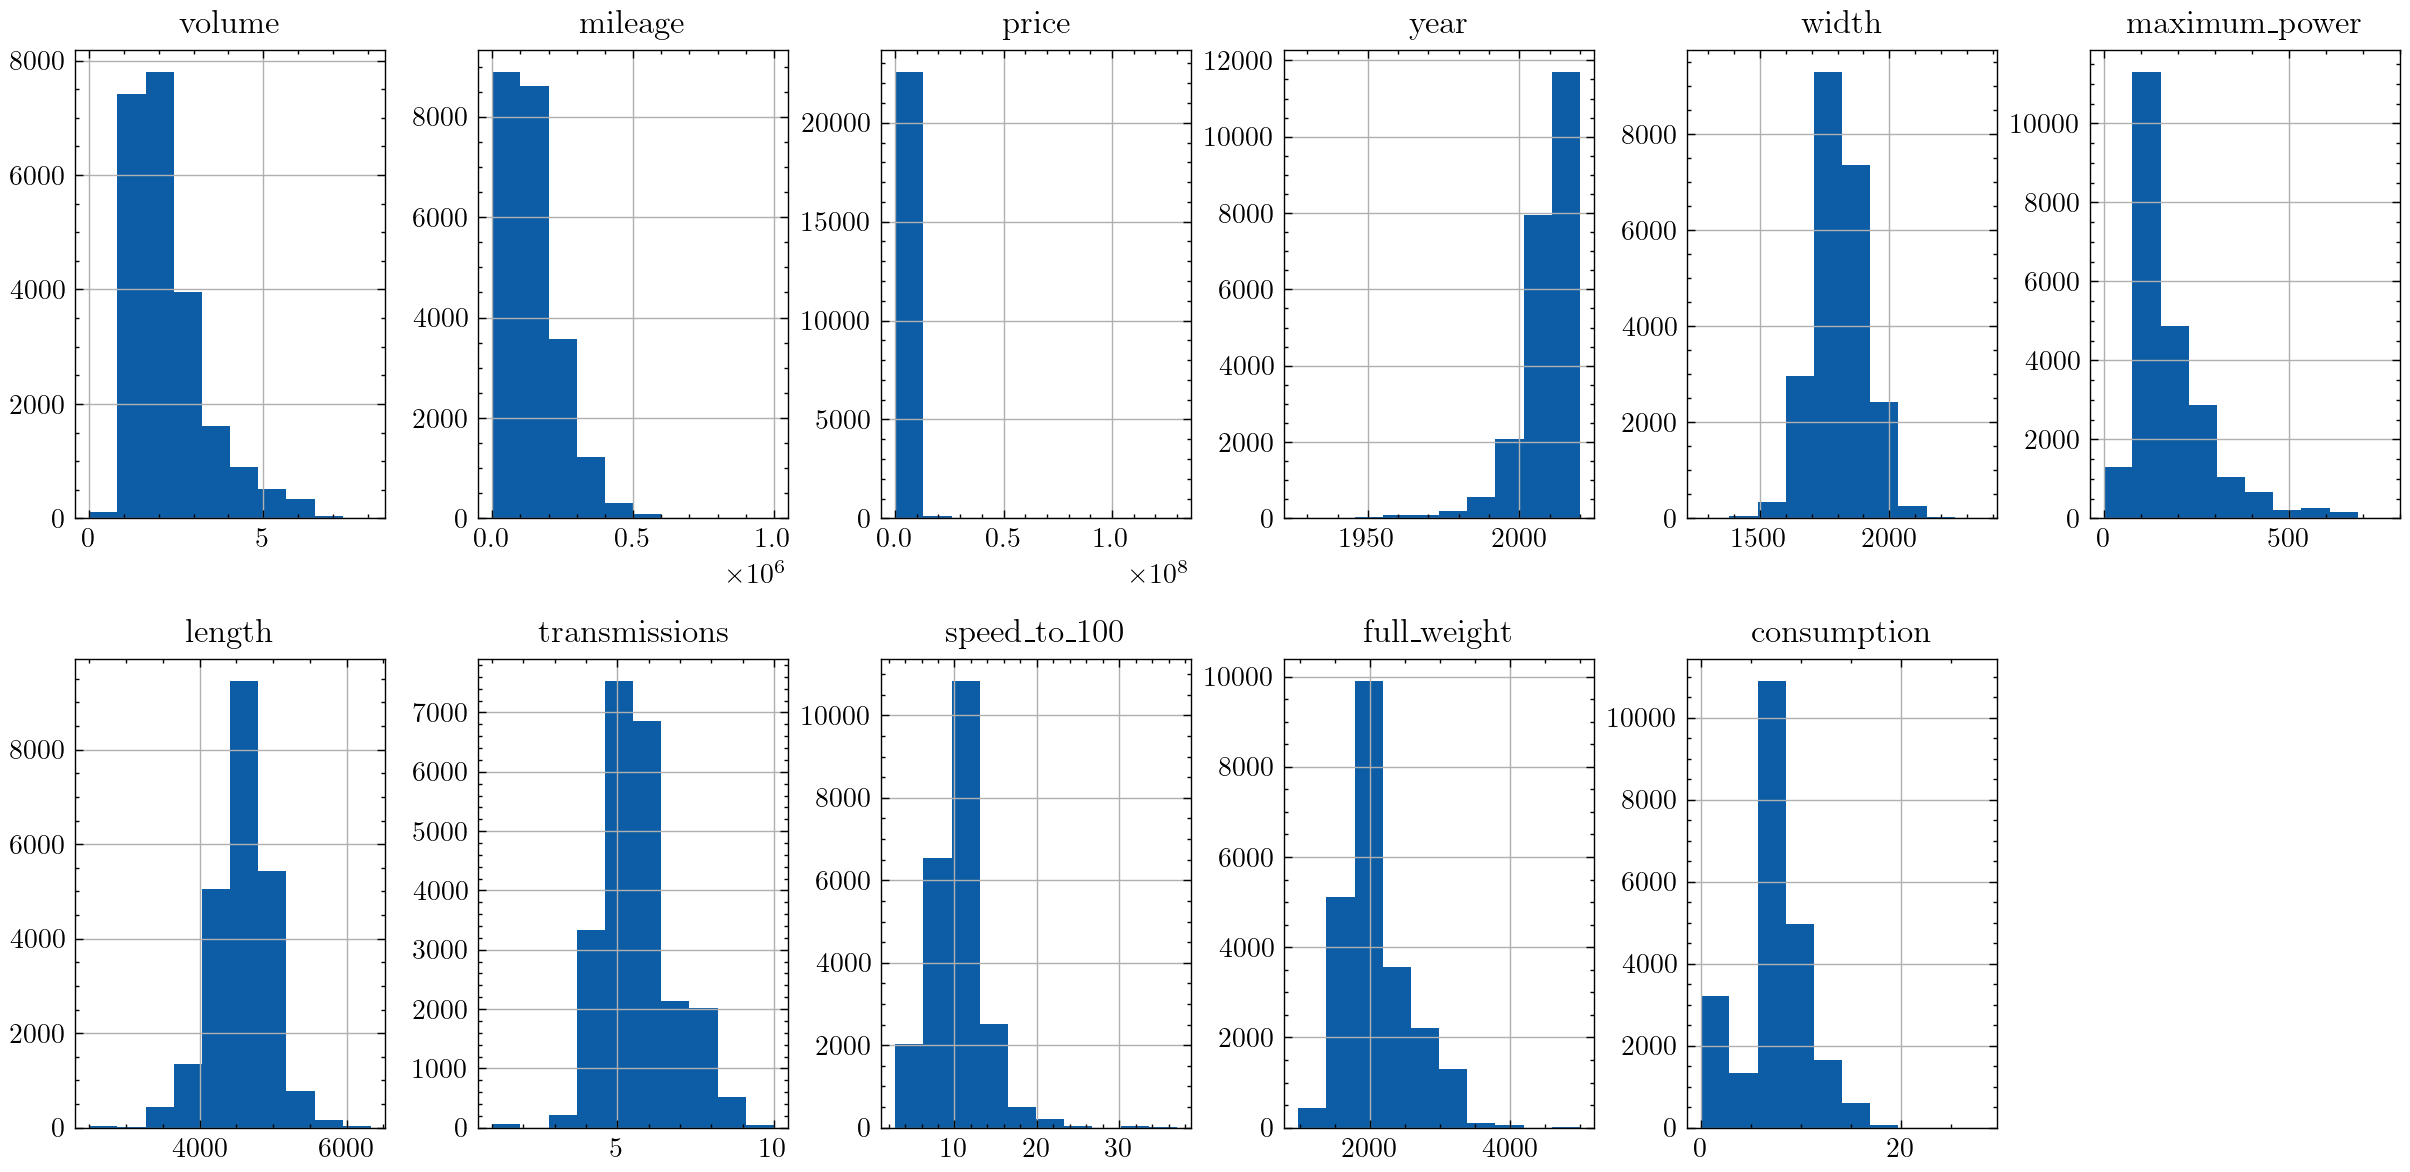

In [77]:
cars_df.hist(figsize=(15, 7), layout=(2, 6));  # numerical features histograms

### Target

In [98]:
print(f'Number of cars: {len(cars_df)}')
price_th = 7 * 1e6
print(f"Number of cars cheaper than {price_th / 1e6:.3f}m: {len(cars_df[cars_df['price'] < price_th])}")

Number of cars: 22702
Number of cars cheaper than 7.000m: 22108


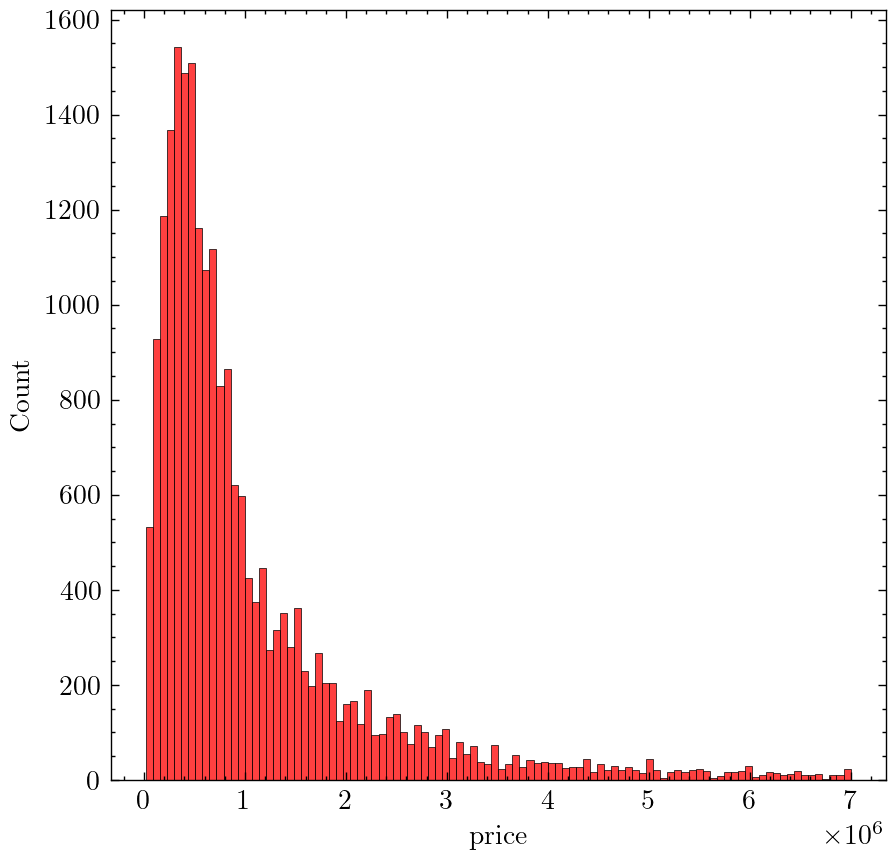

In [99]:
fig, axes = plt.subplots(figsize=(5, 5))
sns.histplot(cars_df['price'][cars_df['price'] < price_th], bins=100, color='r', ax=axes);

In [100]:
cars_df['price'].median()  # median value of the price

680000.0

In [101]:
cars_df['price'].mean()  # 2 times larger than median

1353936.4108448594